# **Notebook EC#02 (Part B)**
# MLP classifier for the CIFAR-10 database.
#### Simplified grid search for the hyperparameters.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula

In [2]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import gc

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
def model_and_evaluate(n_neurons = 1024,
                       n_layers  = 1,
                       dropout   = 0.25,
                       epochs    = 10,
                       optimizer = 'adam',
                       verbose   = 1):
    gc.collect()
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu),
          tf.keras.layers.Dropout(dropout)])

    if n_layers > 1:
        for _ in range(n_layers-1):
            model.add(tf.keras.layers.Dense(n_neurons,activation=tf.nn.relu))
            model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=epochs, verbose=verbose)

    loss, accuracy = model.evaluate(x_test, y_test,verbose=verbose)

    if verbose:
        model.summary()
        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        print("test loss, test acc:", loss, accuracy)

    train_result = dict(n_neurons = n_neurons,
                        n_layers  = n_layers,
                        optimizer = optimizer,
                        dropout   = dropout,
                        epochs    = epochs,
                        loss      = loss,
                        accuracy  = accuracy)
    return loss, accuracy

In [4]:
n_repetitions = 5
DEFAULT = {
    'n_neurons' : 1024,
    'n_layers'  : 1,
    'dropout'   : 0.25,
    'epochs'    : 10,
    'optimizer' : 'adam'
}

df = pd.DataFrame(columns=['n_neurons', 'n_layers', 'dropout', 'epochs','optimizer'] + \
                          [f"{metric} {iteration}" for iteration in range(1, n_repetitions+1) for metric in ['loss', 'accuracy']])

In [5]:
args = DEFAULT.copy()
row = list(args.values())
for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(verbose=0)

        row.append(loss)
        row.append(accuracy)
df.loc[0] = row

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
for n_neurons in [512, 2048, 4096]:
    args = DEFAULT.copy()
    args['n_neurons'] = n_neurons

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_neurons=n_neurons, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_neurons={n_neurons}'] = row


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
for n_layers in [2, 3]:
    args = DEFAULT.copy()
    args['n_layers'] = n_layers

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(n_layers=n_layers, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'n_layers={n_layers}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
for dropout in [0, 0.5]:
    args = DEFAULT.copy()
    args['dropout'] = dropout

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(dropout=dropout, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'dropout={dropout}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
for optimizer in ['RMSprop', 'SGD']:
    args = DEFAULT.copy()
    args['optimizer'] = optimizer

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(optimizer=optimizer, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'optimizer={optimizer}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
for epochs in [5, 20, 30]:
    args = DEFAULT.copy()
    args['epochs'] = epochs

    row = list(args.values())

    for iter in tqdm(range(n_repetitions)):
        loss, accuracy = model_and_evaluate(epochs=epochs, verbose=0)

        row.append(loss)
        row.append(accuracy)

    df.loc[f'epochs={epochs}'] = row

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
df.to_csv('cifar10_EC02_MLP_analysis.csv',index=False)
# df.head()

In [12]:
df = pd.read_csv('cifar10_EC02_MLP_analysis.csv')
df.head()

,n_neurons,n_layers,dropout,epochs,optimizer,loss 1,accuracy 1,loss 2,accuracy 2,loss 3,accuracy 3,loss 4,accuracy 4,loss 5,accuracy 5
0,1024,1,0.25,10,adam,1.615170,0.4131,1.599568,0.4287,1.593696,0.4370,1.601617,0.4292,1.592294,0.4375
1,512,1,0.25,10,adam,1.651963,0.4034,1.650095,0.4072,1.634080,0.4192,1.659325,0.4057,1.646762,0.4063
2,2048,1,0.25,10,adam,1.571110,0.4424,1.548071,0.4562,1.565139,0.4406,1.572613,0.4434,1.581521,0.4291
3,4096,1,0.25,10,adam,1.592452,0.4282,1.561981,0.4440,1.572533,0.4324,1.597842,0.4303,1.593529,0.4309
4,1024,2,0.25,10,adam,1.713563,0.3977,1.699445,0.4017,1.756053,0.3595,1.690599,0.3904,1.756236,0.3844


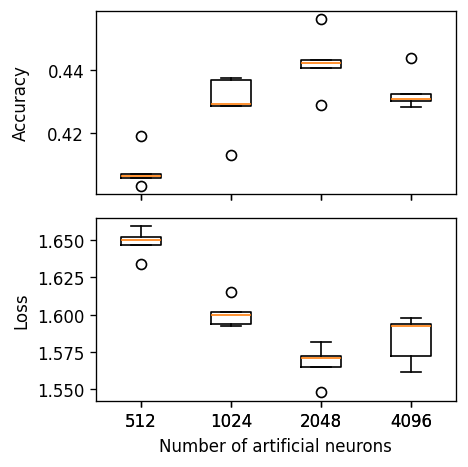

In [18]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, n_neurons in enumerate([512,1024,2048,4096]):
    sample = df[(df['n_neurons'] == n_neurons) & (df['n_layers'] == 1) & (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 10)]
    loss   = sample[[f'loss {i}' for i in range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, tick_labels=[512,1024,2048,4096])
ax[1].boxplot(losses, tick_labels=[512,1024,2048,4096])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of artificial neurons')
fig.align_ylabels()
plt.tight_layout()


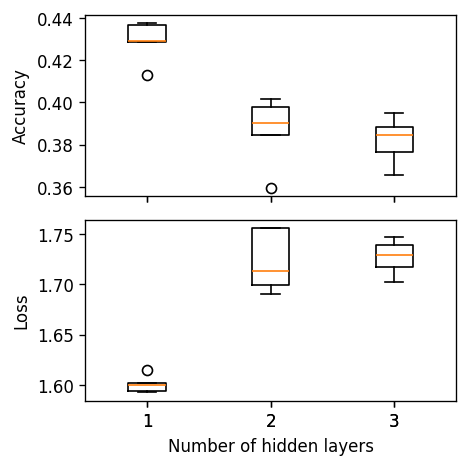

In [19]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, n_layers in enumerate([1,2,3]):
    sample = df[(df['n_neurons'] == 1024) & (df['n_layers'] == n_layers)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == 10)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, tick_labels=[1,2,3])
ax[1].boxplot(losses, tick_labels=[1,2,3])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Number of hidden layers')
fig.align_ylabels()
plt.tight_layout()

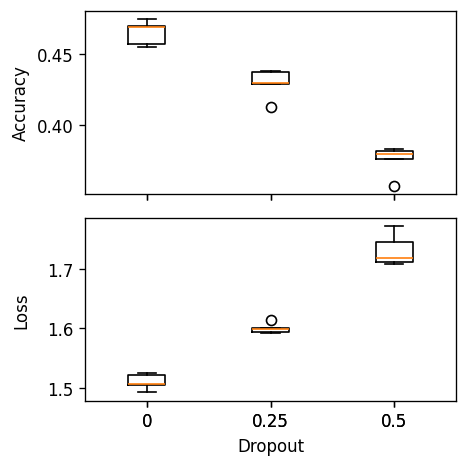

In [20]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, dropout in enumerate([0, 0.25, 0.5]):
    sample = df[(df['n_neurons'] == 1024) & (df['n_layers'] == 1)& (df['dropout'] == dropout) & (df['optimizer'] == 'adam') & (df['epochs'] == 10)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, tick_labels=[0,0.25,0.5])
ax[1].boxplot(losses, tick_labels=[0,0.25,0.5])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Dropout')
fig.align_ylabels()
plt.tight_layout()

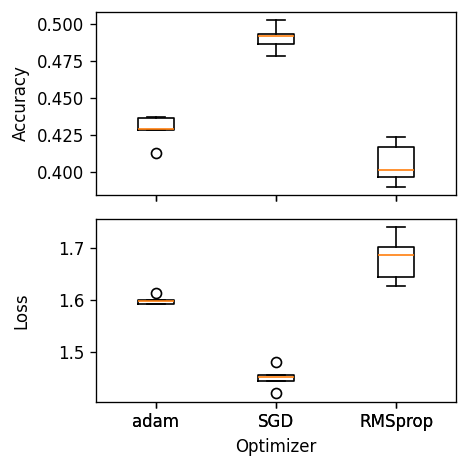

In [21]:
losses = np.zeros((n_repetitions, 3))
accurs = np.zeros((n_repetitions, 3))

for i, optimizer in enumerate(['adam','SGD','RMSprop']):
    sample = df[(df['n_neurons'] == 1024) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == optimizer) & (df['epochs'] == 10)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, tick_labels=['adam','SGD','RMSprop'])
ax[1].boxplot(losses, tick_labels=['adam','SGD','RMSprop'])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Optimizer')
fig.align_ylabels()
plt.tight_layout()

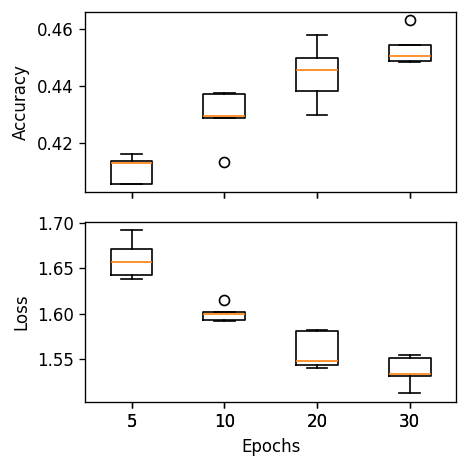

In [22]:
losses = np.zeros((n_repetitions, 4))
accurs = np.zeros((n_repetitions, 4))

for i, epochs in enumerate([5,10,20,30]):
    sample = df[(df['n_neurons'] == 1024) & (df['n_layers'] == 1)& (df['dropout'] == 0.25) & (df['optimizer'] == 'adam') & (df['epochs'] == epochs)]
    loss   = sample[[f'loss {i}' for i in  range(1, n_repetitions+1)]].to_numpy()
    accy   = sample[[f'accuracy {i}' for i in  range(1, n_repetitions+1)]].to_numpy()

    losses[:, i] = loss
    accurs[:, i] = accy

fig,ax=plt.subplots(2,1,figsize=(4,4),dpi=120,sharex=True)

ax[0].boxplot(accurs, tick_labels=[5,10,20,30])
ax[1].boxplot(losses, tick_labels=[5,10,20,30])

ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
fig.align_ylabels()
plt.tight_layout()

In [23]:
# Please, insert the values obtained by the simplified grid search here and execute the code
d = model_and_evaluate(n_neurons=2048,
                       n_layers=1,
                       dropout=0,
                       optimizer='SGD',
                       epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3009 - loss: 1.9516
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4107 - loss: 1.6769
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4420 - loss: 1.5929
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4646 - loss: 1.5341
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4782 - loss: 1.4902
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4943 - loss: 1.4464
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5092 - loss: 1.4075
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5164 - loss: 1.3818
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5289 - loss: 1.3589
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5337 - loss: 1.3358
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5455 - loss: 1.3083
Epoch 12

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     6,293,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,313,996 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Evaluate on test data
test loss, test acc: 1.3184396028518677 0.5422000288963318
